In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

%matplotlib inline

Consider the voltage across a 47 nF capacitor as it discharges from an initial value of 1 V across a 100 kΩ resistor. Add noise with a 10 microvolt amplitude using the random number generator.

In [7]:
t = np.linspace(0,100)    # s
R = 100e3             # Ohm
C = 47e-9             # Farad
tau = R * C * 1000         # ms
V0 = 1.                 # V
alphaV = 10e-6         # V

V = V0*np.exp(-t/tau)

random.seed(0)
Vm = V + alphaV*np.random.randn(np.size(V))

np.savetxt('../data/rc_circuit.csv', np.stack((t,Vm,alphaV*np.ones(np.shape(Vm))), axis=1), 
           fmt='%5.1f,%10.6f,%10.6f', header="Time (s), Voltage (V), alpha_V(V)")

Simulate the measurements shown in *MU* Fig. 5.5, which shows the number of atoms in a trap as a function of time. The data show a double-exponential decay from an initial value of $n=70\times 10^6$ atoms, with decay constants $\tau_1 = 8.67~\text{s}$ and $\tau_2 = 67~\text{s}$

In [10]:
tau = (8.67, 67)
a = (6.5e7, 0.5e7)

alpha_n = 1e5

n_points = 200

t = np.linspace(0, 60, n_points)

n = a[0]*np.exp(-t/tau[0]) + a[1]*np.exp(-t/tau[1])
nm = n + alpha_n*np.random.randn(np.size(n))

np.savetxt('../data/atom_trap.csv', np.stack((t,nm/1e6,(alpha_n/1e6)*np.ones(np.shape(nm))), axis=1), 
           fmt='%5.1f,%10.6f,%10.6f', header="Time (s), Number of atoms/1e6, alpha_(Number of atoms)/1e6")

Current through an ideal diode as a function of applied voltage.

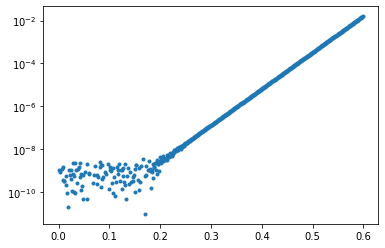

In [13]:
v = np.arange(0, 0.6, 0.001)   # V

k_b= 1.3806e-23     # J/K
q_e = 1.6022e-19    # C
T_r = 296           # Room temperature, in degrees Kelvin

v_t = k_b*T_r/q_e   # Thermal voltage, in Volts
i_s = 1e-12         # Saturation current, in Amperes

i = i_s*(np.exp(v/v_t) -1)
alpha_i = 1e-9
im = i + alpha_i*random.randn(np.size(i))

plt.semilogy(v,im,'.');